# Speaker Vector

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/speaker-vector](https://github.com/huseinzol05/malaya-speech/tree/master/example/speaker-vector).
    
</div>

<div class="alert alert-info">

This module is language independent, so it save to use on different languages. Pretrained models trained on multilanguages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np

`pyaudio` is not available, `malaya_speech.streaming.stream` is not able to use.


In [3]:
import logging

logging.basicConfig(level=logging.INFO)

### List available deep model

In [4]:
malaya_speech.speaker_vector.available_model()

INFO:malaya_speech.speaker_vector:tested on VoxCeleb2 test set. Lower EER is better.
INFO:malaya_speech.speaker_vector:download the test set at https://github.com/huseinzol05/malaya-speech/tree/master/data/voxceleb


,Size (MB),Quantized Size (MB),Embedding Size,EER
deep-speaker,96.7,24.40,512.0,0.21870
vggvox-v1,70.8,17.70,1024.0,0.13944
vggvox-v2,43.2,7.92,512.0,0.04460
conformer-base,99.4,27.20,512.0,0.06938
conformer-tiny,20.3,6.21,512.0,0.08687


**Smaller EER the better model is**.

### Load deep model

```python
def deep_model(model: str = 'vggvox-v2', quantized: bool = False, **kwargs):
    """
    Load Speaker2Vec model.

    Parameters
    ----------
    model : str, optional (default='speakernet')
        Check available models at `malaya_speech.speaker_vector.available_model()`.
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya_speech.supervised.classification.load function
    """
```

In [4]:
model = malaya_speech.speaker_vector.deep_model('conformer-base')

2023-01-27 23:13:07.304958: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 23:13:07.314286: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-27 23:13:07.314317: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: husein-MS-7D31
2023-01-27 23:13:07.314322: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: husein-MS-7D31
2023-01-27 23:13:07.314421: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: Not found: was unable to find libcuda.so DSO loaded into this program
2023-01-27 23:13:07.314615: I tensorflow/stream

In [16]:
from glob import glob

speakers = ['speech/example-speaker/khalil-nooh.wav',
'speech/example-speaker/mas-aisyah.wav',
'speech/example-speaker/shafiqah-idayu.wav',
'speech/example-speaker/husein-zolkepli.wav'
           ]

### Pipeline

In [17]:
def load_wav(file):
    return malaya_speech.load(file)[0]

p = Pipeline()
frame = p.foreach_map(load_wav).map(model)

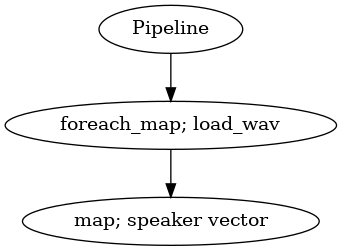

In [18]:
p.visualize()

In [19]:
r = p(speakers)

### Calculate similarity

In [20]:
from scipy.spatial.distance import cdist

1 - cdist(r['speaker-vector'], r['speaker-vector'], metric = 'cosine')

array([[ 1.        , -0.40519101, -0.35340283,  0.41143028],
       [-0.40519101,  1.        ,  0.49214888, -0.43672686],
       [-0.35340283,  0.49214888,  1.        , -0.27411077],
       [ 0.41143028, -0.43672686, -0.27411077,  1.        ]])

Remember, our files are,

```python
['speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']
```